In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Bank Data

df = pd.read_csv('bank-full.csv',sep=';',na_values = "unknown")


In [3]:
df.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1,-1,0,NaN,no
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1,-1,0,NaN,no
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1,-1,0,NaN,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#As I have checked data is huge so I am selecting 60% data for my project

bank_data = df.sample(frac = 0.6)

In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27127 entries, 15229 to 21312
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        27127 non-null  int64 
 1   job        26955 non-null  object
 2   marital    27127 non-null  object
 3   education  25981 non-null  object
 4   default    27127 non-null  object
 5   balance    27127 non-null  int64 
 6   housing    27127 non-null  object
 7   loan       27127 non-null  object
 8   contact    19262 non-null  object
 9   day        27127 non-null  int64 
 10  month      27127 non-null  object
 11  duration   27127 non-null  int64 
 12  campaign   27127 non-null  int64 
 13  pdays      27127 non-null  int64 
 14  previous   27127 non-null  int64 
 15  poutcome   4916 non-null   object
 16  y          27127 non-null  object
dtypes: int64(7), object(10)
memory usage: 3.7+ MB


In [7]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,27127.000000,27127.000000,27127.000000,27127.000000,27127.000000,27127.000000,27127.000000
mean,41.002654,1363.134294,15.828842,257.213293,2.769344,39.915877,0.590445
std,10.640184,3007.549882,8.351408,254.807034,3.064784,99.665235,2.565501
min,18.000000,-4057.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,449.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1413.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,98417.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
bank_data.shape

(27127, 17)

# Data Pre-Processing

In [9]:
#Fecthing the name of categorical columns
cat_cols = []
num_cols = []
for col in bank_data.columns:
    if(bank_data[col].dtypes == 'object'):
        cat_cols.append(col)
    else:
        num_cols.append(col)

print(cat_cols)
print(num_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [10]:
#checking how many unique values are there in categorical columns

for col in cat_cols:
    print('For: {}'.format(col))
    print(bank_data[col].value_counts())

For: job
blue-collar      5893
management       5637
technician       4547
admin.           3081
services         2438
retired          1400
self-employed     938
entrepreneur      904
unemployed        818
housemaid         744
student           555
Name: job, dtype: int64
For: marital
married     16347
single       7655
divorced     3125
Name: marital, dtype: int64
For: education
secondary    13840
tertiary      8015
primary       4126
Name: education, dtype: int64
For: default
no     26649
yes      478
Name: default, dtype: int64
For: housing
yes    15140
no     11987
Name: housing, dtype: int64
For: loan
no     22756
yes     4371
Name: loan, dtype: int64
For: contact
cellular     17536
telephone     1726
Name: contact, dtype: int64
For: month
may    8245
jul    4123
aug    3682
jun    3256
nov    2366
apr    1742
feb    1625
jan     893
oct     443
sep     338
mar     285
dec     129
Name: month, dtype: int64
For: poutcome
failure    2917
other      1096
success     903
Name: poutc

In [11]:
#finding NUll Values
bank_data.isnull().sum()

age              0
job            172
marital          0
education     1146
default          0
balance          0
housing          0
loan             0
contact       7865
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     22211
y                0
dtype: int64

* There are 4 columns which are having missing values -
1. job
2. education
3. contact
4. poutcome

* It is clear that poutcome has most of NUll vbalues os it's redundent column and we will delete the same.
* contact communication type columns has many NULL values and also, it's not important for analysis.


# # Exploratory Data Analysis

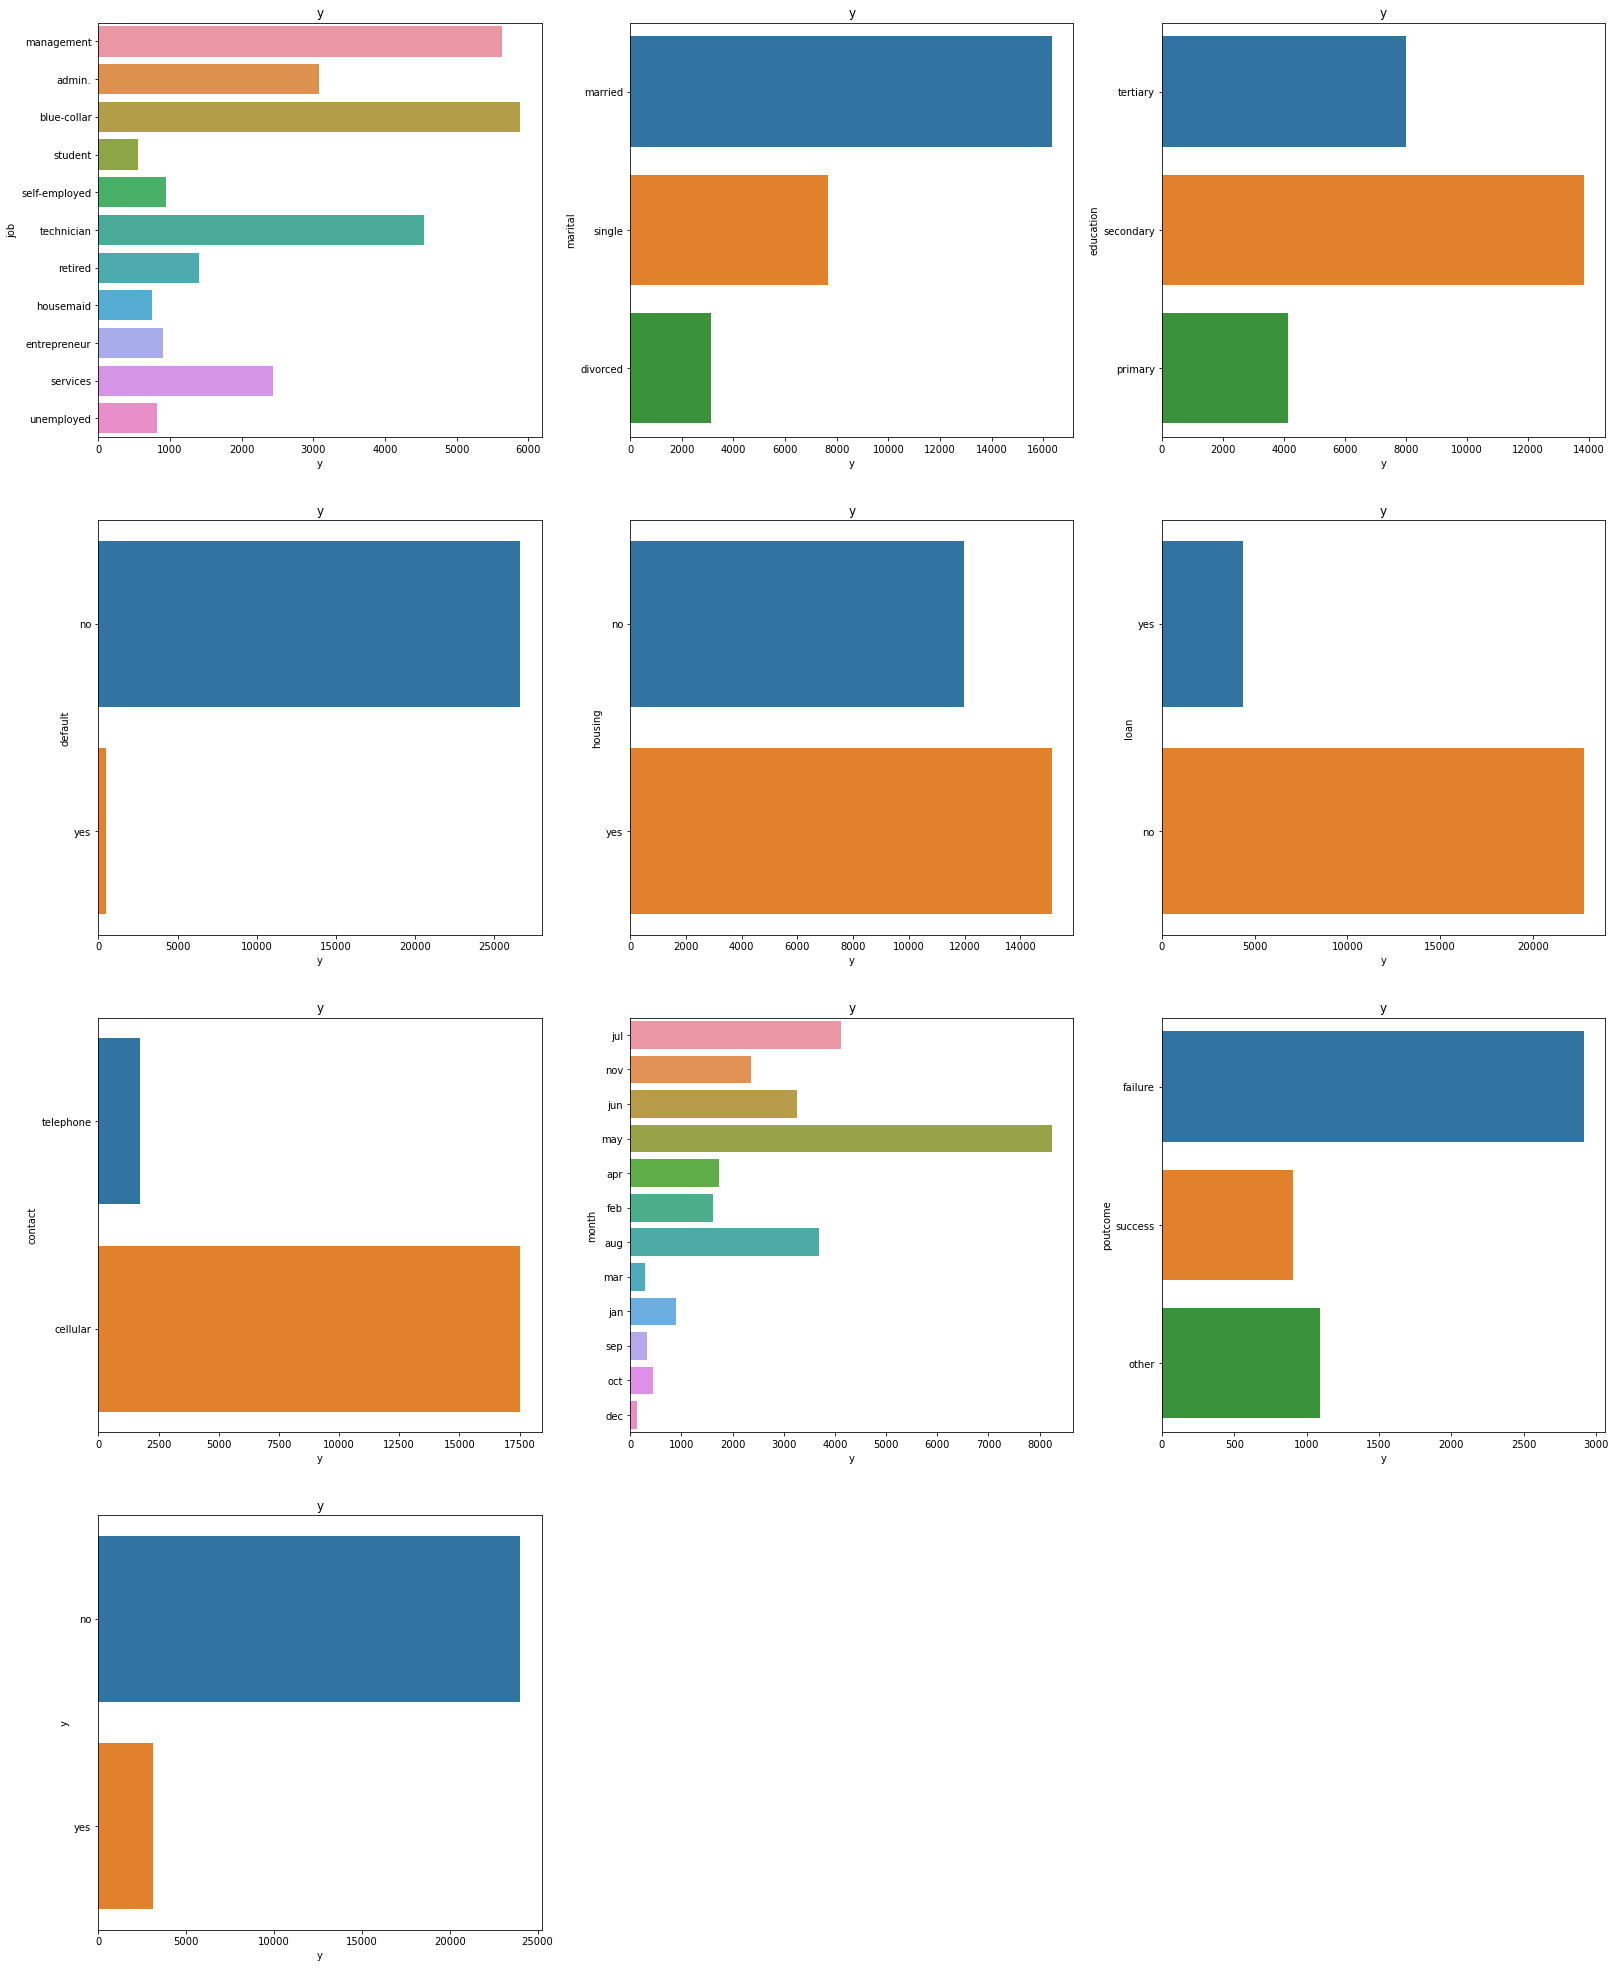

In [12]:
# Creating a plot for count of Categorical Columns
plt.figure(figsize = (27,90))
no = 1
for cat_col in cat_cols:
    plt.subplot(10,3,no)
    sns.countplot(y=cat_col, data = bank_data)
    plt.xlabel(col)
    plt.title(col)
    no += 1
plt.show()

1. In the job column Management and Bluecoller clients are the most.
2. Married clients are the most in campaigning
3. Mostly clients hasn't default credit.
4. Secondry and Teritry clients are the most in compare to primary
5. There are most probably equal clints who are having house or noe
6. There are huge nos who are not having term deposit

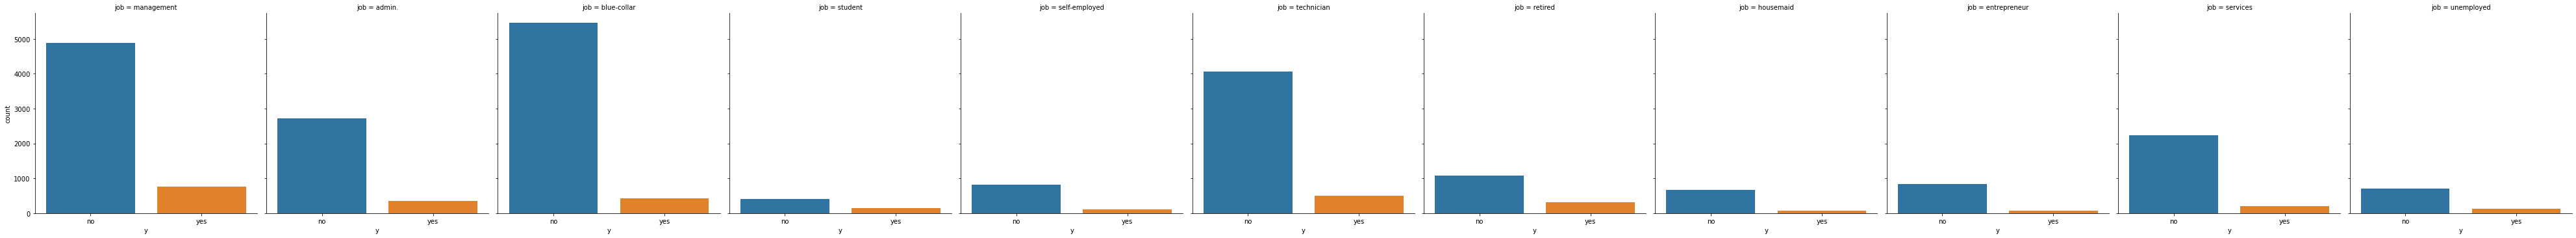

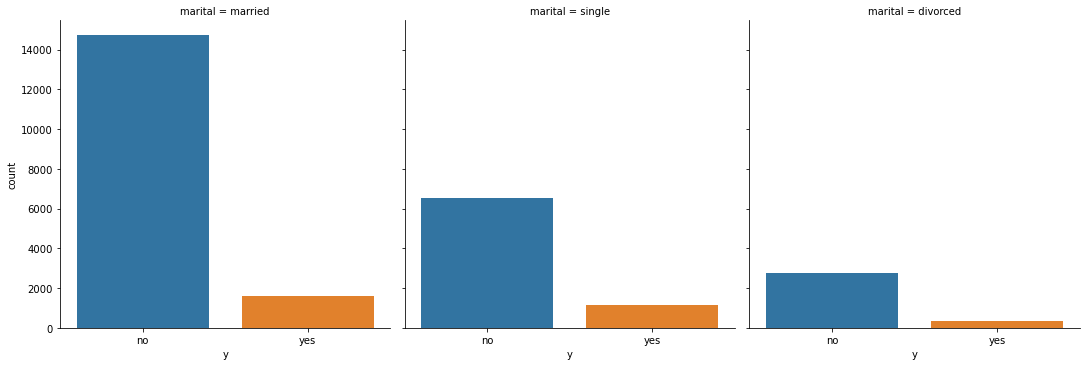

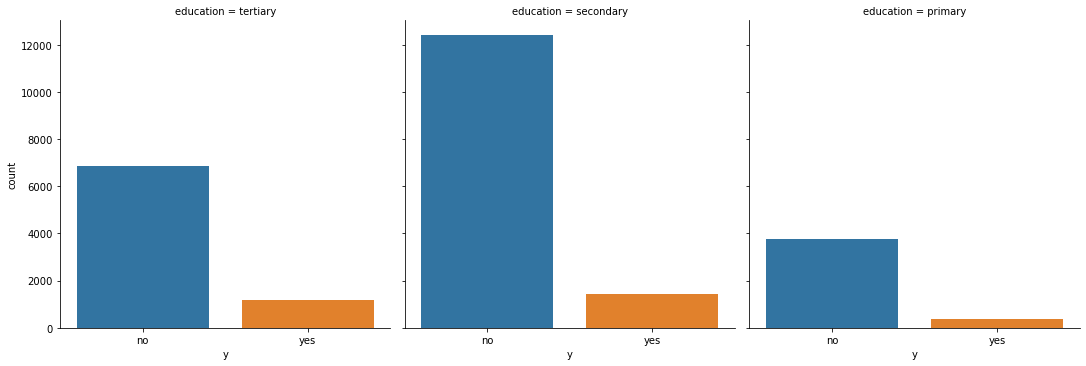

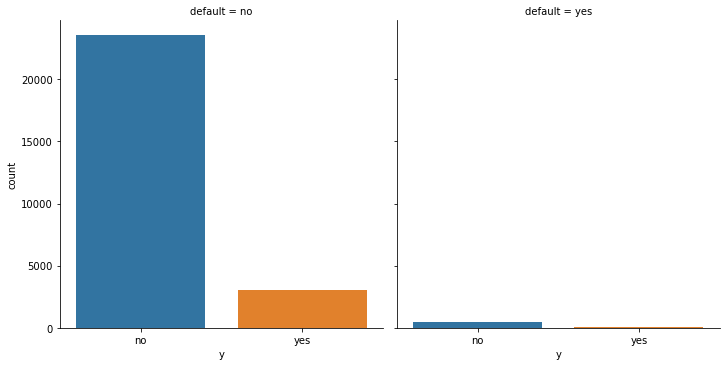

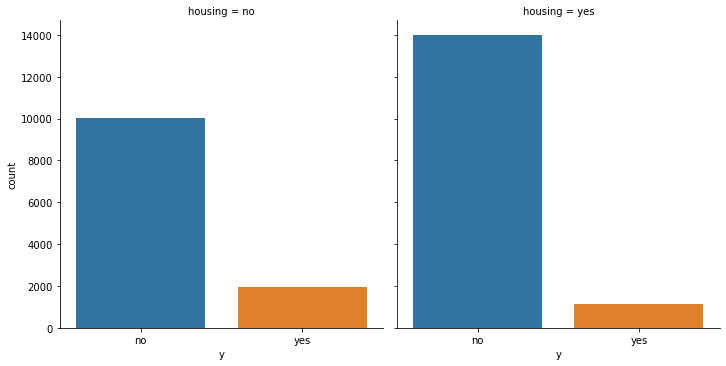

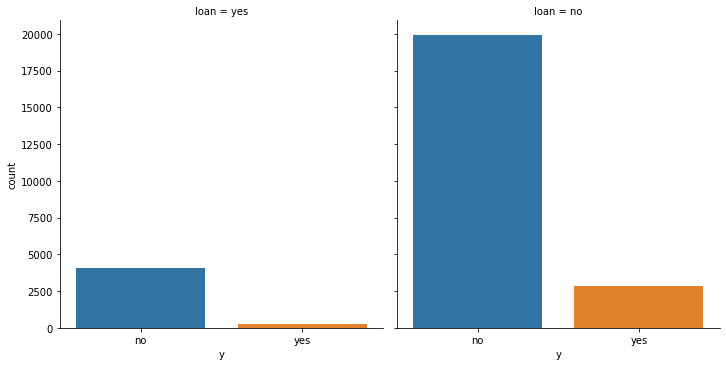

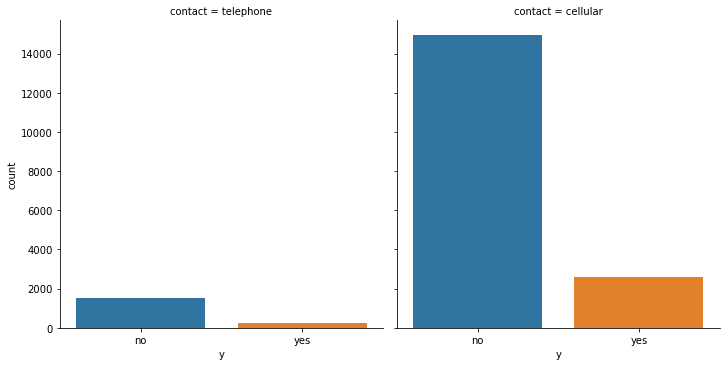

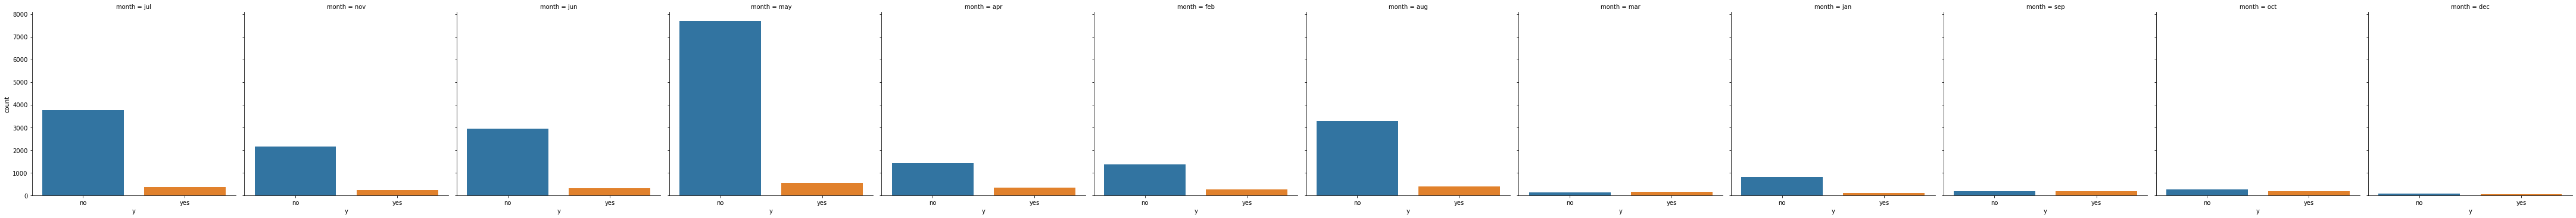

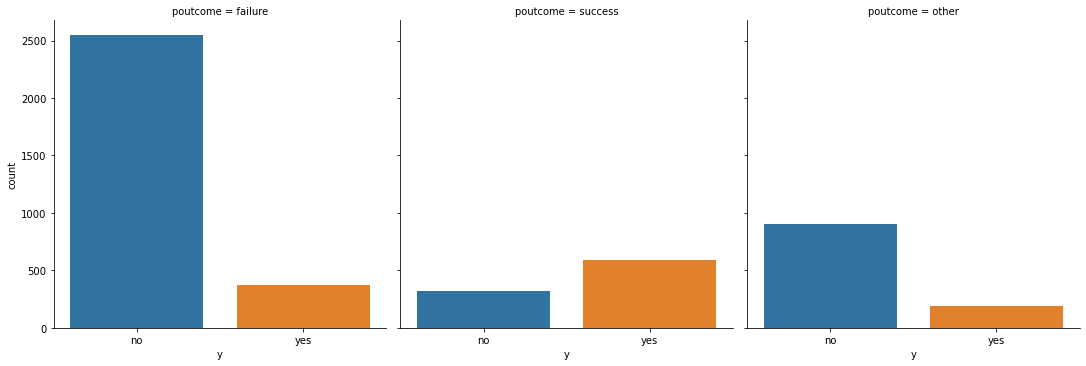

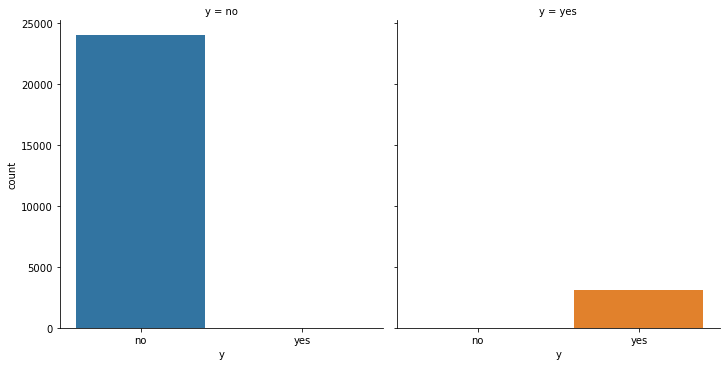

In [13]:
#Creating a plot for categorical column with relationship with target variable

#plt.figure(figsize = (27,90))
no = 1
for cat_col in cat_cols:
    sns.catplot(x = 'y', col=cat_col, kind= 'count', data = bank_data)
    
plt.show()

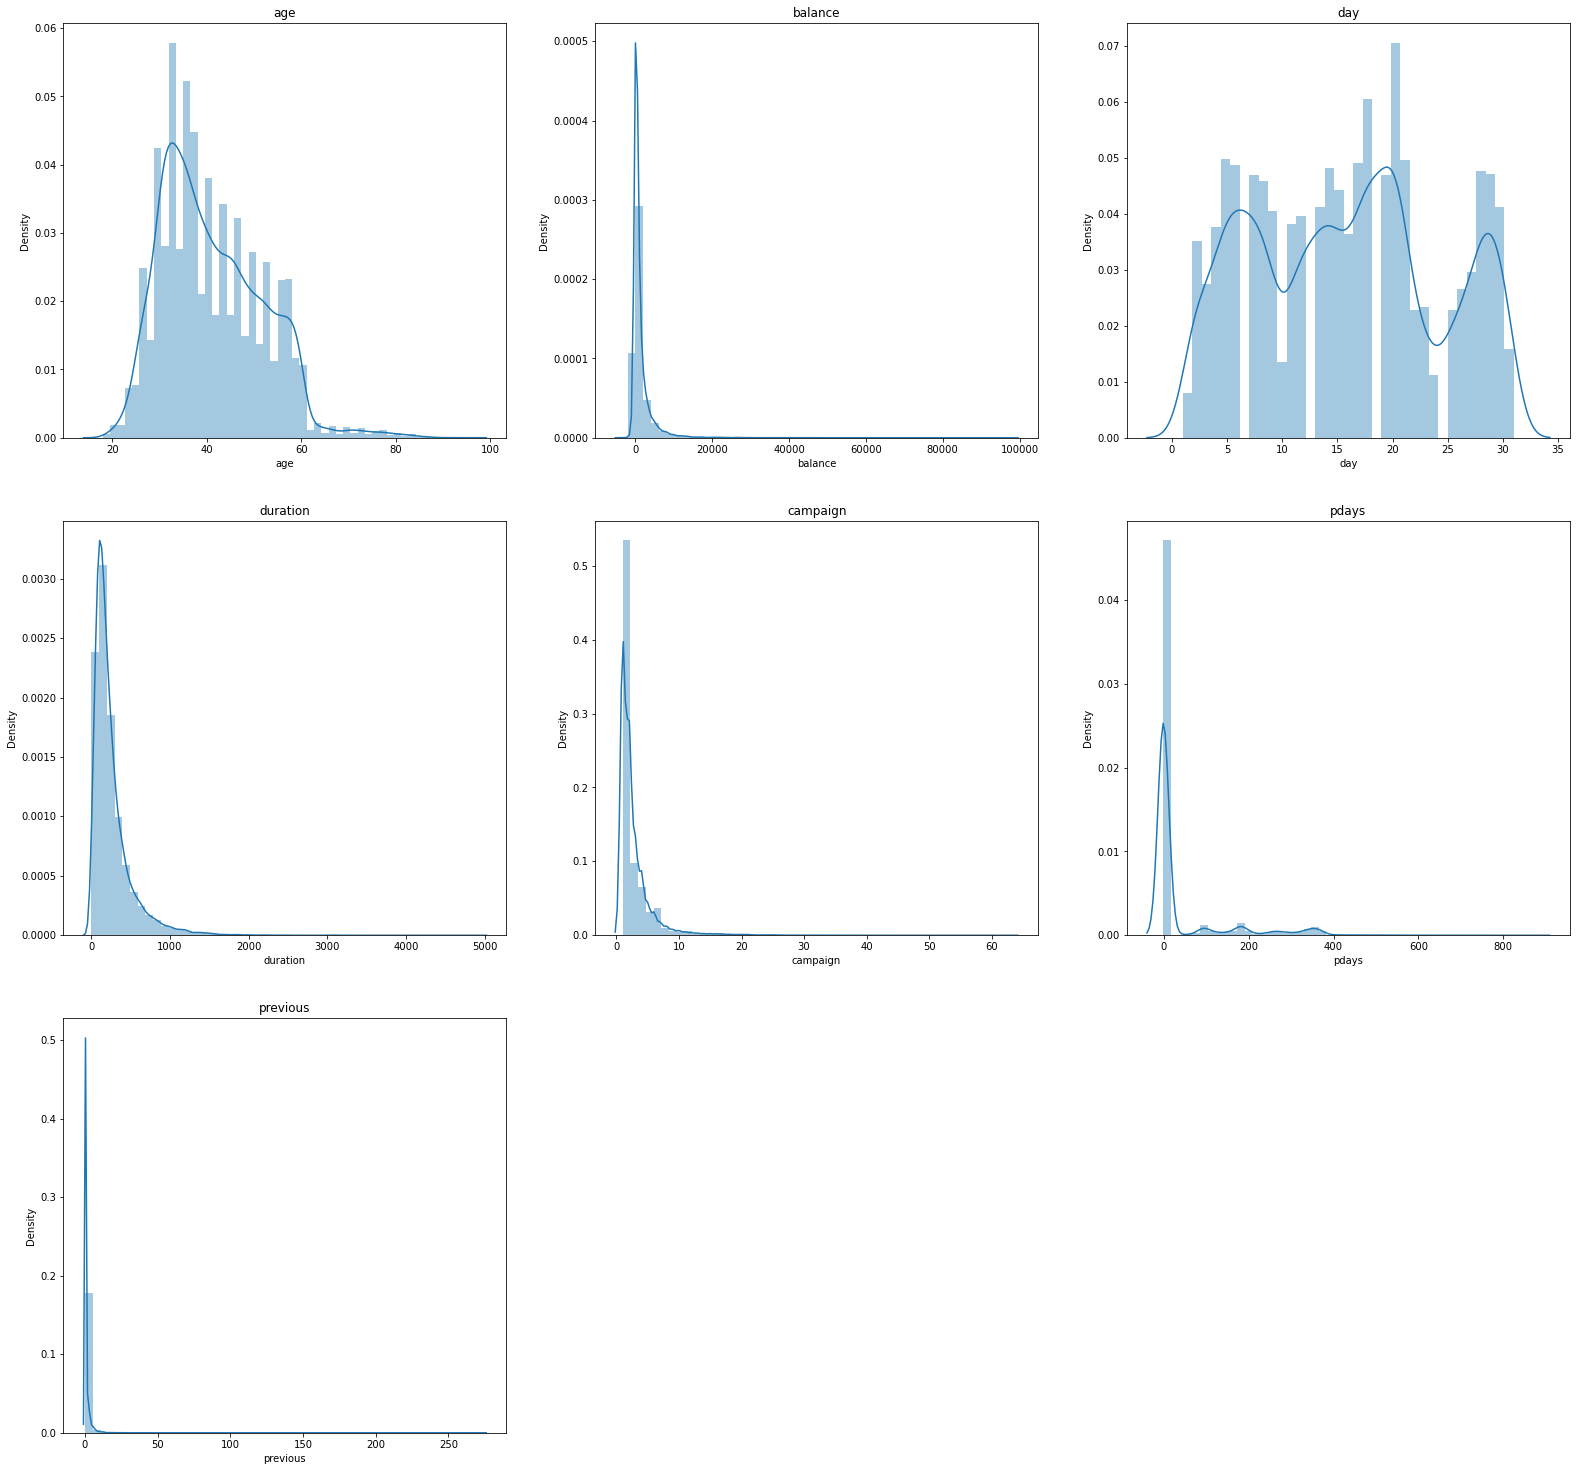

In [14]:
#Finding relationship between Numerical Featire
# Chcecking distribution of Numerical Feature

# Creating a plot for count of Categorical Columns
plt.figure(figsize = (27,90), facecolor='white')
no = 1
for num_col in num_cols:
    plt.subplot(10,3,no)
    sns.distplot(bank_data[num_col])
    plt.xlabel(num_col)
    plt.title(num_col)
    no += 1
plt.show()

1. It seems age and months are normally distributed.
2. Rest of the data are left skewed and having some outliers as well.

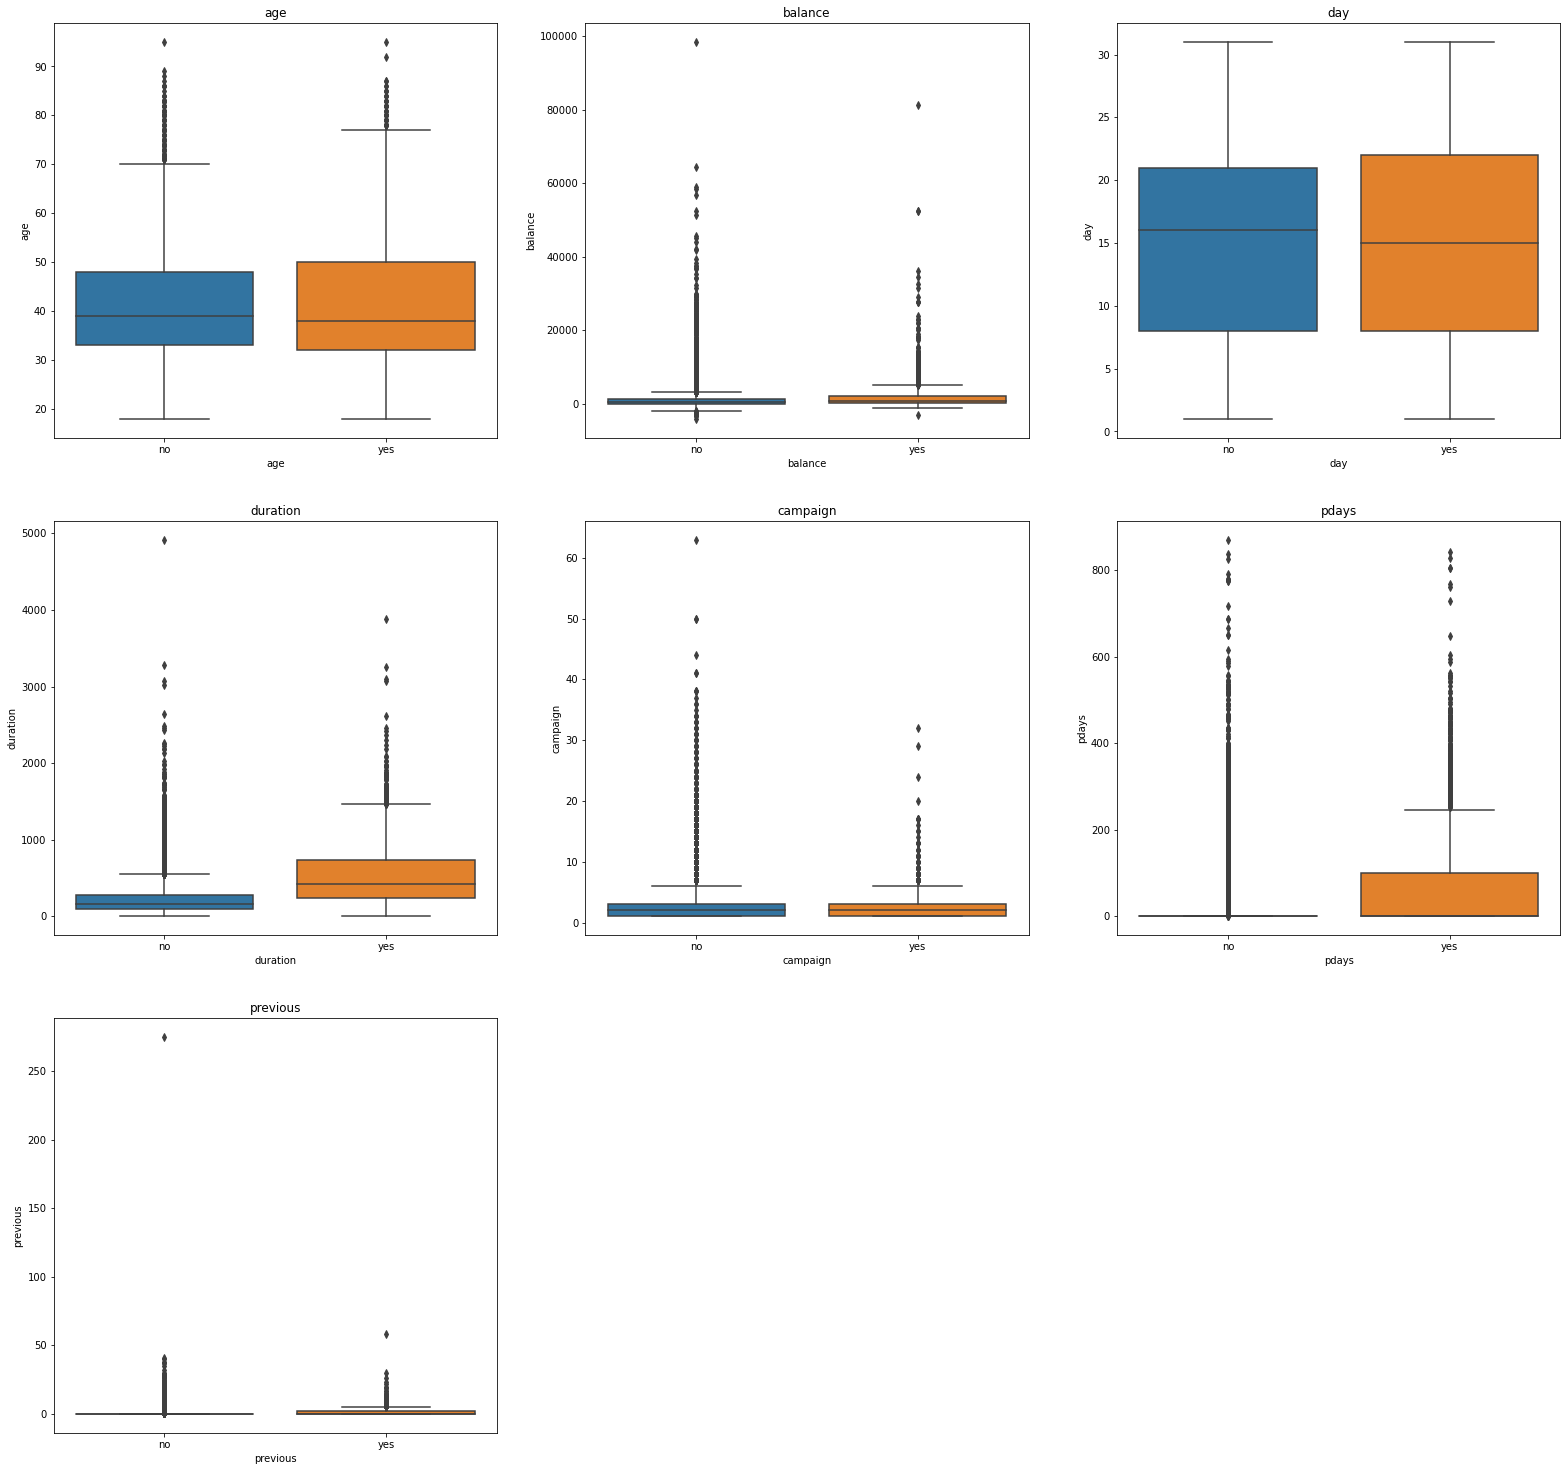

In [15]:
# Checking relationship of term demopit with numerical variable with help if box plot

plt.figure(figsize = (27,90), facecolor='white')
no = 1
for num_col in num_cols:
    plt.subplot(10,3,no)
    sns.boxplot(x = 'y', y = bank_data[num_col], data = bank_data)
    plt.xlabel(num_col)
    plt.title(num_col)
    no += 1
plt.show()

1. Who are retired or older age people more inetrested in term deposite. 
2. Who had longer discussion more interested in Term Deposit

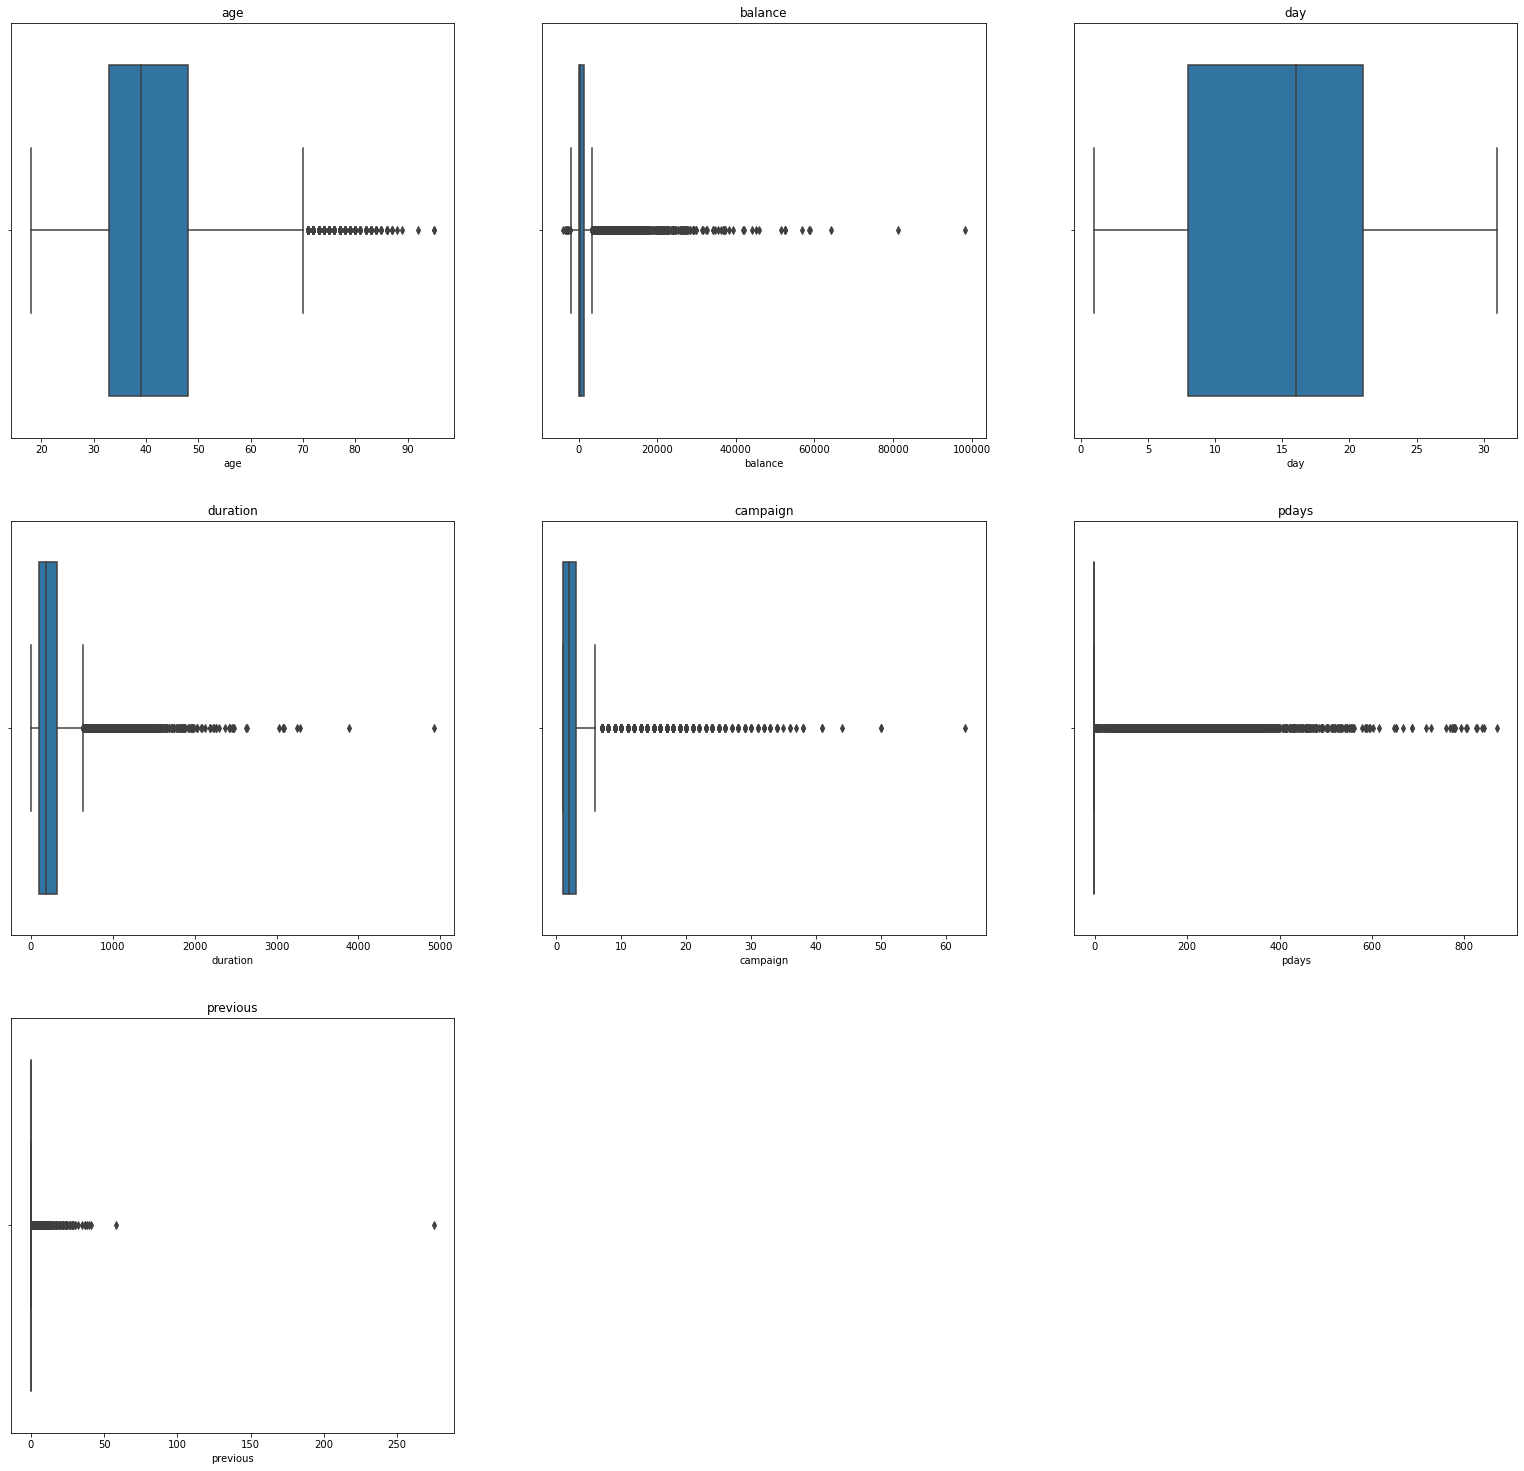

In [16]:
# Checking of Ouliers with the help of Boxplot

plt.figure(figsize = (27,90), facecolor='white')
no = 1
for num_col in num_cols:
    plt.subplot(10,3,no)
    sns.boxplot(bank_data[num_col])
    plt.title(num_col)
    no += 1
plt.show()

Previous, balance, pdays, age, compaign has some outliers

<AxesSubplot:>

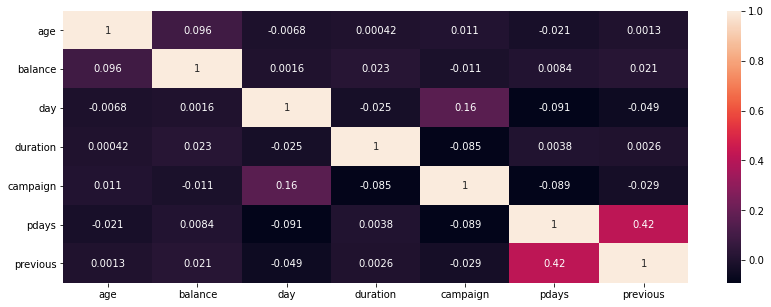

In [17]:
#Creating heatmap to show correlation between numerical features

corr_mat = bank_data.corr()
plt.figure(figsize=(14,5))

sns.heatmap(corr_mat, annot=True)

There is not feature heavily Co-related to each other

<AxesSubplot:xlabel='y', ylabel='count'>

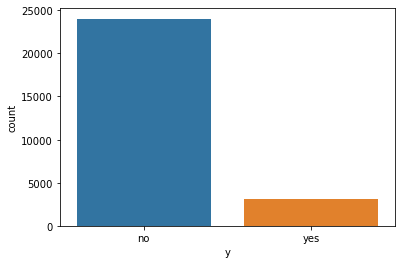

In [18]:
sns.countplot(bank_data['y'])

 It seems that target variable is not balanced, we need to follow some technique to resolve this issue.

In [19]:
backup = bank_data.copy()

In [20]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
15229,34,management,married,tertiary,no,118,no,yes,telephone,17,jul,171,3,-1,0,NaN,no
26962,39,admin.,single,secondary,no,2263,yes,yes,telephone,21,nov,1158,9,-1,0,NaN,yes
9712,35,blue-collar,single,primary,no,3798,no,no,NaN,6,jun,19,1,-1,0,NaN,no
26466,32,management,married,tertiary,no,3651,yes,no,cellular,20,nov,142,3,-1,0,NaN,no
12208,36,student,single,secondary,no,904,no,no,NaN,20,jun,10,8,-1,0,NaN,no


# Data Cleaning

In [21]:
#Replacing the values of binary columns in 0 and 1
bank_data['default'] = bank_data['default'].map({"no":0,"yes":1})
bank_data['loan'] = bank_data['loan'].map({"no":0,"yes":1})
bank_data['housing'] = bank_data['housing'].map({"no":0,"yes":1})
bank_data['y'] = bank_data['y'].map({"no":0,"yes":1})

In [22]:
#Filling NaN values in job and education column 

bank_data['job'].value_counts()


blue-collar      5893
management       5637
technician       4547
admin.           3081
services         2438
retired          1400
self-employed     938
entrepreneur      904
unemployed        818
housemaid         744
student           555
Name: job, dtype: int64

In [23]:
bank_data['education'].value_counts()

secondary    13840
tertiary      8015
primary       4126
Name: education, dtype: int64

In [24]:
# As checked, in job column blue-coller has most count and in education column secondary has most count so replacing the nan values with the same in respective columns
bank_data['job'].fillna('blue-collar', inplace = True)
bank_data['education'].fillna('secondary', inplace = True)

In [25]:
bank_data.isnull().sum()

age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact       7865
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     22211
y                0
dtype: int64

In [26]:
# I observered that education column has ordinal data so converting their values according to rank

bank_data['education'] = bank_data['education'].map({"primary":0, "tertiary": 1,"secondary":2 })

#Converting Marital Status values
bank_data['marital'] = bank_data['marital'].map({"married":0, "single": 1, "divorced": 2})

In [27]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
15229,34,management,0,1,0,118,0,1,telephone,17,jul,171,3,-1,0,NaN,0
26962,39,admin.,1,2,0,2263,1,1,telephone,21,nov,1158,9,-1,0,NaN,1
9712,35,blue-collar,1,0,0,3798,0,0,NaN,6,jun,19,1,-1,0,NaN,0
26466,32,management,0,1,0,3651,1,0,cellular,20,nov,142,3,-1,0,NaN,0
12208,36,student,1,2,0,904,0,0,NaN,20,jun,10,8,-1,0,NaN,0


In [28]:
#Converting month column into numbers
import datetime
bank_data['month'] = pd.to_datetime(bank_data['month'], format = "%b").dt.month

bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
15229,34,management,0,1,0,118,0,1,telephone,17,7,171,3,-1,0,NaN,0
26962,39,admin.,1,2,0,2263,1,1,telephone,21,11,1158,9,-1,0,NaN,1
9712,35,blue-collar,1,0,0,3798,0,0,NaN,6,6,19,1,-1,0,NaN,0
26466,32,management,0,1,0,3651,1,0,cellular,20,11,142,3,-1,0,NaN,0
12208,36,student,1,2,0,904,0,0,NaN,20,6,10,8,-1,0,NaN,0


In [29]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
15229,34,management,0,1,0,118,0,1,telephone,17,7,171,3,-1,0,NaN,0
26962,39,admin.,1,2,0,2263,1,1,telephone,21,11,1158,9,-1,0,NaN,1
9712,35,blue-collar,1,0,0,3798,0,0,NaN,6,6,19,1,-1,0,NaN,0
26466,32,management,0,1,0,3651,1,0,cellular,20,11,142,3,-1,0,NaN,0
12208,36,student,1,2,0,904,0,0,NaN,20,6,10,8,-1,0,NaN,0


In [30]:
# Deleting Contact and poutcome, pdays columns as these are redundent

bank_data.drop(['contact','poutcome','pdays'], inplace=True, axis = 1)

In [31]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,previous,y
15229,34,management,0,1,0,118,0,1,17,7,171,3,0,0
26962,39,admin.,1,2,0,2263,1,1,21,11,1158,9,0,1
9712,35,blue-collar,1,0,0,3798,0,0,6,6,19,1,0,0
26466,32,management,0,1,0,3651,1,0,20,11,142,3,0,0
12208,36,student,1,2,0,904,0,0,20,6,10,8,0,0


In [32]:
df1 = pd.get_dummies(bank_data['job'], drop_first = True)

In [33]:
bank = pd.concat([bank_data,df1], axis = 1)

In [34]:
#Droping Job column
bank.drop('job', axis = 1, inplace=True)

In [35]:
bank.shape

(27127, 23)

In [36]:
#Spliting Data in X and Y

X = bank.drop('y', axis = 1)
y = bank['y']


In [37]:
#spliting Data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Building Model Using Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
L_model = LogisticRegression()
L_model.fit(X_train, Y_train)

LogisticRegression()

In [39]:
y_pred = L_model.predict(X_test)

In [40]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [42]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7234
           1       0.55      0.17      0.25       905

    accuracy                           0.89      8139
   macro avg       0.73      0.57      0.60      8139
weighted avg       0.86      0.89      0.87      8139



In [43]:
accuracy_L = accuracy_score(Y_test, y_pred)
accuracy_L 

0.8922472048163165

I have acieved 88% accuracy with Logistic Regression that is good accuracy but I will try some differet algorithms as well.

## Building Model Using XG Boost

In [44]:
import xgboost as xgb

In [45]:
# Define and Fitting the model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state = 42)
xgb_model.fit(X_train,Y_train)

[10:31:17] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
#Doing Predictions
yp_xggb = xgb_model.predict(X_test)

In [47]:
# Creating Confusion Matrix
C_xbg = confusion_matrix(Y_test,yp_xggb)
C_xbg 

array([[6936,  298],
       [ 508,  397]], dtype=int64)

In [48]:
#CHecking Accuracy Score
accuracy_xgb = accuracy_score(Y_test, yp_xggb)
accuracy_xgb

0.9009706352131711

## Building Model with Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
DTE = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTE.fit(X_train, Y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [51]:
yp_dt = DTE.predict(X_test)

In [52]:
# Creating Confusion Matrix
C_dt = confusion_matrix(Y_test,yp_dt)
C_dt

array([[6712,  522],
       [ 498,  407]], dtype=int64)

In [53]:
#Checking Accuracy Score
accuracy_dt = accuracy_score(Y_test, yp_dt)
accuracy_dt

0.8746774788057501

# Conclusion

I have builded with 3 classification models and achieved good accuracy with XGB Classifier algorithm that is 89.7%. So we will save XGB classifier model and can test further data with the same.

In [54]:
import pickle

In [59]:
with open('Bank_Analysis', 'wb') as f:
    pickle.dump(xgb_model,f)